# Data Preprocessing

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_overview import DfOverview
from df_cleaner import DfCleaner
import vis_seaborn as vis_helper

## Data reading

In [4]:
df_descript = pd.read_excel("../data/field_descriptions.xlsx")
missing_values = ["n/a", "na", "undefined"]
df = pd.read_csv("../data/Week1_challenge_data_source.csv",
                 na_values=missing_values)

In [5]:
cleaner = DfCleaner()

In [6]:
df_descript['field_label'] = df_descript['Fields'].apply(cleaner.fixLabel)
df_descript = df_descript[['field_label', 'Fields', 'Description']]
df_descript.set_index('field_label', inplace=True)
df_descript

,Fields,Description
field_label,,
bearer_id,bearer id,xDr session identifier
dur_(ms),Dur. (ms),Total Duration of the xDR (in ms)
start,Start,Start time of the xDR (first frame timestamp)
start_ms,Start ms,Milliseconds offset of start time for the xDR (first frame timestamp)
end,End,End time of the xDR (last frame timestamp)
end_ms,End ms,Milliseconds offset of end time of the xDR (last frame timestamp)
dur_(s),Dur. (s),Total Duration of the xDR (in s)
imsi,IMSI,International Mobile Subscriber Identity
msisdn_number,MSISDN/Number,MS International PSTN/ISDN Number of mobile - customer number


In [7]:
df.columns = [cleaner.fixLabel(label) for label in df.columns]
df[:2]

,bearer_id,start,start_ms,end,end_ms,dur_(ms),imsi,msisdn_number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans_vol_(bytes),tcp_ul_retrans_vol_(bytes),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),http_dl_(bytes),http_ul_(bytes),activity_duration_dl_(ms),activity_duration_ul_(ms),dur_(ms)1,handset_manufacturer,handset_type,nb_of_sec_with_125000b_<_vol_dl,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_dl_<_31250b,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


## Data Understanding

### Dataset shape

In [8]:
df.shape

(150001, 55)

### Detailed Information On the Dataset

In [9]:
overview = DfOverview(df)
dfOverview = overview.getOverview()
dfOverview.sort_values(by=["none_count"], inplace=True)
dfOverview

,unique_value_count,unique_percentage,none_count,none_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,
youtube_dl_(bytes),149547,99.7%,0,0.0%,1.0,3.0,1.00,1.0,float64
other_ul_(bytes),149284,99.52%,0,0.0%,1.0,3.0,1.00,1.0,float64
other_dl_(bytes),149986,99.99%,0,0.0%,1.0,2.0,1.00,1.0,float64
gaming_ul_(bytes),149316,99.54%,0,0.0%,1.0,3.0,1.00,1.0,float64
gaming_dl_(bytes),149983,99.99%,0,0.0%,1.0,2.0,1.00,1.0,float64
netflix_ul_(bytes),149490,99.66%,0,0.0%,1.0,3.0,1.00,1.0,float64
netflix_dl_(bytes),149518,99.68%,0,0.0%,1.0,3.0,1.00,1.0,float64
youtube_ul_(bytes),149477,99.65%,0,0.0%,1.0,3.0,1.00,1.0,float64
email_ul_(bytes),138699,92.47%,0,0.0%,1.0,4.0,1.08,1.0,float64


## Data Cleaning

In [10]:
df.shape

(150001, 55)

In [11]:
df = cleaner.drop_duplicate(df)
df.shape

(150001, 55)

In [12]:
columns = cleaner.columns_too_much_null(dfOverview, 20)
columns

['http_dl_(bytes)',
 'http_ul_(bytes)',
 'tcp_dl_retrans_vol_(bytes)',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'tcp_ul_retrans_vol_(bytes)',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_37500b_<_vol_ul']

In [13]:
cleaner.drop_columns(df, columns)
df[:2]

,bearer_id,start,start_ms,end,end_ms,dur_(ms),imsi,msisdn_number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),activity_duration_dl_(ms),activity_duration_ul_(ms),dur_(ms)1,handset_manufacturer,handset_type,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [14]:
df[['dur_(ms)', 'dur_(ms)1']]

,dur_(ms),dur_(ms)1
0,1823652.0,1.823653e+09
1,1365104.0,1.365104e+09
2,1361762.0,1.361763e+09
3,1321509.0,1.321510e+09
4,1089009.0,1.089009e+09
...,...,...
149996,81230.0,8.123076e+07
149997,97970.0,9.797070e+07
149998,98249.0,9.824953e+07
149999,97910.0,9.791063e+07


In [15]:
cleaner.drop_columns(df, ["dur_(ms)1"])

In [16]:
overview = DfOverview(df)
dfOverview = overview.getOverview()
dfOverview.sort_values(by=["none_count"], inplace=True)
dfOverview

,unique_value_count,unique_percentage,none_count,none_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,
google_ul_(bytes),147267,98.18%,0,0.0%,1.0,4.0,1.02,1.0,float64
netflix_dl_(bytes),149518,99.68%,0,0.0%,1.0,3.0,1.00,1.0,float64
youtube_ul_(bytes),149477,99.65%,0,0.0%,1.0,3.0,1.00,1.0,float64
gaming_dl_(bytes),149983,99.99%,0,0.0%,1.0,2.0,1.00,1.0,float64
gaming_ul_(bytes),149316,99.54%,0,0.0%,1.0,3.0,1.00,1.0,float64
other_dl_(bytes),149986,99.99%,0,0.0%,1.0,2.0,1.00,1.0,float64
google_dl_(bytes),149024,99.35%,0,0.0%,1.0,3.0,1.01,1.0,float64
netflix_ul_(bytes),149490,99.66%,0,0.0%,1.0,3.0,1.00,1.0,float64
youtube_dl_(bytes),149547,99.7%,0,0.0%,1.0,3.0,1.00,1.0,float64


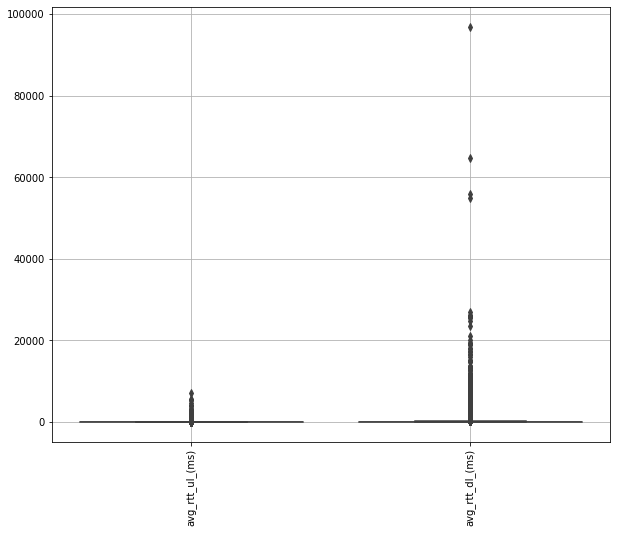

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data=df[['avg_rtt_ul_(ms)',
                          'avg_rtt_dl_(ms)']])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)

In [18]:
df['avg_rtt_ul_(ms)'] = cleaner.fix_missing_ffill(df, 'avg_rtt_ul_(ms)')
df['avg_rtt_dl_(ms)'] = cleaner.fix_missing_ffill(df, 'avg_rtt_dl_(ms)')

Impute with mode value for categorical

In [19]:
df = cleaner.fill_with_mode(df, ['handset_type', 'handset_manufacturer'])

In [20]:
overview = DfOverview(df)
dfOverview = overview.getOverview()
dfOverview.sort_values(by=["none_count"], inplace=True)
dfOverview

,unique_value_count,unique_percentage,none_count,none_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,
youtube_dl_(bytes),149547,99.7%,0,0.0%,1.0,3.0,1.00,1.0,float64
email_ul_(bytes),138699,92.47%,0,0.0%,1.0,4.0,1.08,1.0,float64
netflix_ul_(bytes),149490,99.66%,0,0.0%,1.0,3.0,1.00,1.0,float64
handset_manufacturer,169,0.11%,0,0.0%,1.0,69124.0,887.58,4.0,object
avg_rtt_ul_(ms),722,0.48%,0,0.0%,1.0,18815.0,207.76,2.0,float64
avg_rtt_dl_(ms),2130,1.42%,0,0.0%,1.0,4750.0,70.42,2.0,float64
gaming_ul_(bytes),149316,99.54%,0,0.0%,1.0,3.0,1.00,1.0,float64
netflix_dl_(bytes),149518,99.68%,0,0.0%,1.0,3.0,1.00,1.0,float64
other_dl_(bytes),149986,99.99%,0,0.0%,1.0,2.0,1.00,1.0,float64


In [21]:
print(cleaner.percent_missing(df))

0.2


In [22]:
df.dropna(inplace=True)

In [23]:
overview = DfOverview(df)
dfOverview = overview.getOverview()
dfOverview.sort_values(by=["none_count"], inplace=True)
dfOverview

,unique_value_count,unique_percentage,none_count,none_percentage,min_value,max_value,mean,median,dtype
label,,,,,,,,,
bearer_id,133246,88.83%,0,0.0%,1.0,16.0,1.10,1.0,float64
handset_manufacturer,167,0.11%,0,0.0%,1.0,67892.0,879.59,3.0,object
handset_type,133246,88.83%,0,0.0%,1.0,16.0,1.10,1.0,object
nb_of_sec_with_vol_dl_<_6250b,22203,14.8%,0,0.0%,1.0,925.0,6.62,2.0,float64
nb_of_sec_with_vol_ul_<_1250b,22891,15.26%,0,0.0%,1.0,551.0,6.42,1.0,float64
social_media_dl_(bytes),143875,95.92%,0,0.0%,1.0,3.0,1.02,1.0,float64
social_media_ul_(bytes),58756,39.17%,0,0.0%,1.0,11.0,2.50,2.0,float64
google_dl_(bytes),145954,97.3%,0,0.0%,1.0,3.0,1.01,1.0,float64
google_ul_(bytes),144290,96.19%,0,0.0%,1.0,3.0,1.02,1.0,float64


In [24]:
df.shape

(146891, 44)

## Data types

In [25]:
df = cleaner.convert_to_datetime(df, ['start', 'end'])

In [26]:
df = cleaner.convert_to_string(df, ["last_location_name", "handset_manufacturer", "handset_type"])

In [27]:
columns_with_other_data = [
    'start', 'end', "last_location_name", "handset_manufacturer", "handset_type"]
columns = [col if col not in columns_with_other_data else ' ' for col in df]
columns  = list(filter(lambda a: a != ' ', columns))
columns

['bearer_id',
 'start_ms',
 'end_ms',
 'dur_(ms)',
 'imsi',
 'msisdn_number',
 'imei',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'social_media_dl_(bytes)',
 'social_media_ul_(bytes)',
 'google_dl_(bytes)',
 'google_ul_(bytes)',
 'email_dl_(bytes)',
 'email_ul_(bytes)',
 'youtube_dl_(bytes)',
 'youtube_ul_(bytes)',
 'netflix_dl_(bytes)',
 'netflix_ul_(bytes)',
 'gaming_dl_(bytes)',
 'gaming_ul_(bytes)',
 'other_dl_(bytes)',
 'other_ul_(bytes)',
 'total_ul_(bytes)',
 'total_dl_(bytes)']

In [29]:
df = cleaner.convert_to_numbers(df, columns)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146891 entries, 0 to 149999
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   bearer_id                       146891 non-null  float64       
 1   start                           146891 non-null  datetime64[ns]
 2   start_ms                        146891 non-null  float64       
 3   end                             146891 non-null  datetime64[ns]
 4   end_ms                          146891 non-null  float64       
 5   dur_(ms)                        146891 non-null  float64       
 6   imsi                            146891 non-null  float64       
 7   msisdn_number                   146891 non-null  float64       
 8   imei                            146891 non-null  float64       
 9   last_location_name              146891 non-null  object        
 10  avg_rtt_dl_(ms)                 146891 non-null  float64

In [31]:
df.to_csv('../data/processed_data.csv', index=False)